# Pyber Rideshare Analysis

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single database
city_fare = pd.DataFrame(ride_df.groupby("city")["fare"].mean())
city_fare = city_fare.reset_index()
city_rides = pd.DataFrame(ride_df.groupby("city")["ride_id"].count())
city_rides = city_rides.reset_index()
df = city_df.merge(city_fare,on="city")
df = df.merge(city_rides, on="city")
df = df.rename(columns={"ride_id" : "ride count", "fare": "average fare"})
df = df.set_index("city")
df.head()
# Display the data table for preview

,driver_count,type,average fare,ride count
city,,,,
Richardfort,38,Urban,22.373214,28
Williamsstad,59,Urban,24.362174,23
Port Angela,67,Urban,23.836842,19
Rodneyfort,34,Urban,28.616957,23
West Robert,39,Urban,25.123871,31


## Bubble Plot of Ride Sharing Data

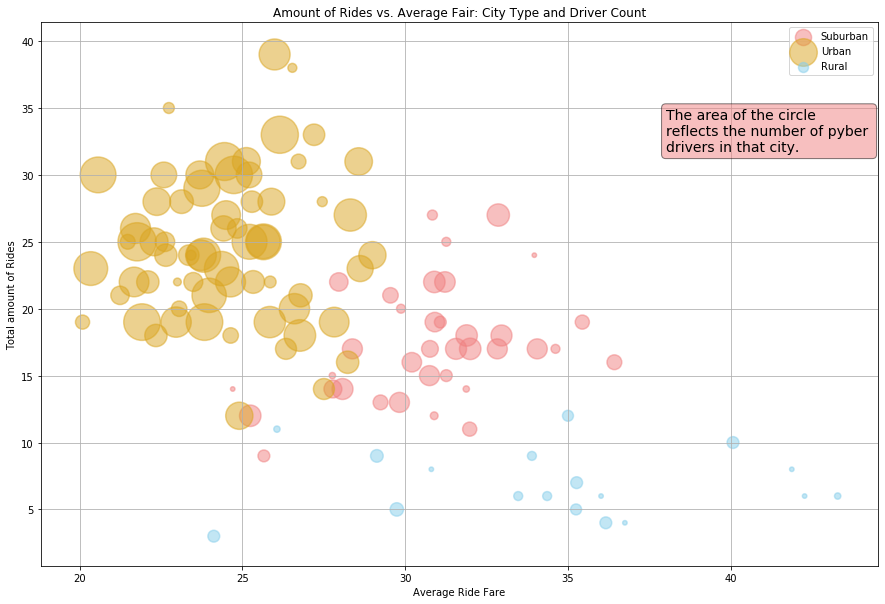

In [3]:

matplotlib.rcParams['figure.figsize'] = [15, 10]
colors = ['lightcoral', 'goldenrod', 'skyblue']
types = list(set(df["type"].unique()))


# Build the scatter plots for each city types    
for i in range(3):
    
    type_df = df.loc[df["type"] == types[i]]
    
    # Obtain the x and y coordinates for each of the three city types
    x = type_df["average fare"]
    y = type_df["ride count"]
    
    plt.scatter(x, y, s = type_df["driver_count"]*20, alpha=.5, label= types[i], color=colors[i], linewidths=1.5)

# Incorporate the other graph properties

plt.grid()
plt.xlabel("Average Ride Fare")
plt.ylabel("Total amount of Rides")
plt.title("Amount of Rides vs. Average Fair: City Type and Driver Count")
# Create a legend
plt.legend()
# Incorporate a text label
props = dict(boxstyle='round', facecolor='lightcoral', alpha=0.5)

textstr = "The area of the circle \nreflects the number of pyber \ndrivers in that city."
plt.text(38, 35, textstr,  fontsize=14,
        verticalalignment='top', bbox=props)
# Save Figure
plt.savefig("bubble.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

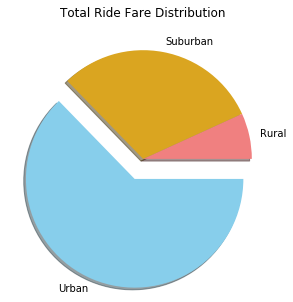

In [5]:
# Calculate Type Percents
matplotlib.rcParams['figure.figsize'] = [5, 5]
fare_type = ride_df.merge(city_df, on="city", how="inner")
data = fare_type.groupby("type")["fare"].sum()
data.plot(kind="pie",explode=(0, 0, 0.2),shadow=True, colors=colors)
# Build Pie Chart
plt.ylabel("")
plt.title("Total Ride Fare Distribution")

# Save Figure
plt.savefig("fare_pie.png")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

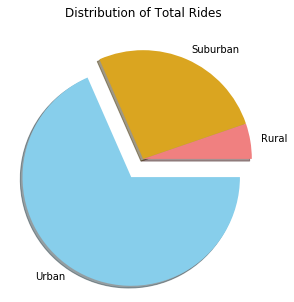

In [7]:


fare_type = ride_df.merge(city_df, on="city", how="inner")
data = fare_type.groupby("type")["ride_id"].count()
data.plot(kind="pie",explode=(0, 0, 0.2),shadow=True, colors=colors)
# Build Pie Chart
plt.ylabel("")
plt.title("Distribution of Total Rides")

# Build Pie Chart

# Save Figure
plt.savefig("rides_pie.png")

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

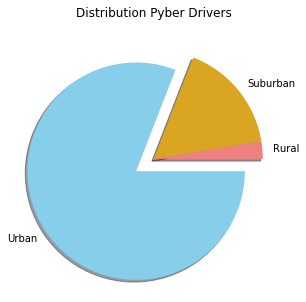

In [9]:
# Calculate Driver Percents
driver_total = city_df.groupby("type")["driver_count"].sum()
# Build Pie Charts
driver_total.plot(kind="pie", colors=colors, shadow=True, explode=(0,0,.2))
plt.ylabel("")
plt.title("Distribution Pyber Drivers")

# Save Figure
plt.savefig("drivers_pie.png")

In [10]:
# Show Figure
plt.show()

# Conclusions
* From the bubble plot, it is clear that in general, cities with lower average fares tend to have more frequent users. (Alternativly more rides and drivers lends towards lower average fares). This trend is less clear within rural cities, where some sities have low fares and few rides.

* As expected, urban cities account for over 75% of the total amount of drivers. However, due to the relative pricing between urban/rural cities, urban cities due not account for 75% of the total revenue.

* Suburban Cities, despite have the same amount of unique drivers as some urban cities, offer a significantly larger average fare. This profitability can also been seen in the fare distribution pie chart.